<h1 align="center">Applied Data Science Capstone</h1> 
<h3 align="center">Final Assignment</h3>
<h4 align="center">Segmenting and Clustering Neighborhoods in Toronto</h4>

In [ ]:
# Install dependencies
# !pip install geopy
# !pip install folium
# !pip install seaborn

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import json
from geopy.geocoders import Nominatim # Address -> (Latitude,Longitude) 
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import folium
print('All Libraries imported!')

All Libraries imported!


In [18]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
url = "https://raw.githubusercontent.com/SoumyadeepB/Coursera_Capstone/master/df_toronto_loc.csv"
neighborhoods = pd.read_csv(url,index_col=0)
neighborhoods.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494


#### Find how many boroughs and neighborhoods

In [3]:
print("Boroughs: ",len(neighborhoods['Borough'].unique()))
print("Neighborhoods: ",neighborhoods.shape[0])

Boroughs:  10
Neighborhoods:  103


#### Using the geopy library to get the co-ordinates(latitude and longitude) of Toronto

In [4]:
address = 'Toronto, Canada'
geolocator = Nominatim(user_agent="Toronto")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Co-ordinates of Toronto:  ({}, {})'.format(latitude, longitude))

Co-ordinates of Toronto:  (43.6534817, -79.3839347)


#### Visualizing the neighbourhoods and boroughs of Toronto

In [ ]:
# create map of Toronto using latitude and longitude values
toronto_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='red',
        fill_opacity=0.5,
        parse_html=False).add_to(toronto_map)  
    
toronto_map

#### Using Foursquare API to get data regarding the nearby locations

In [6]:
CLIENT_ID = '' #Foursquare ID
CLIENT_SECRET = '' #Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

### Explore Neighborhoods in Toronto


In [125]:
def getVenues(names, latitudes, longitudes, radius=1000):
    venue_list=[]
    results=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION,lat, lng, radius, LIMIT)
            
        # GET request
        req =  requests.get(url).json()
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        if results:
            venue_list.append([(name,v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'], v['venue']['categories'][0]['name']) for v in results])

    
    venues = pd.DataFrame([item for venue_list in venue_list for item in venue_list])
    venues.columns = ['Neighborhood','Venue', 'Latitude', 'Longitude', 'Category']
    
    return(venues)

#### Create a DataFrame to contain all nearby venues 

In [126]:
neighborhood_venues = getVenues(names=neighborhoods['Neighborhood'],latitudes=neighborhoods['Latitude'],
                                longitudes=neighborhoods['Longitude'])

In [219]:
#neighborhoods['Neighborhood']=neighborhoods['Neighborhood'].str.strip()
top_locations=neighborhood_venues['Category'].value_counts().to_frame().reset_index()
top_locations.columns=['Venue','Number']
top_locations.head()

,Venue,Number
0,Coffee Shop,382
1,Café,204
2,Park,150
3,Restaurant,148
4,Pizza Place,144


### Top 5 Venues in Toronto 

In [ ]:
plt.figure(figsize=(24, 8))
sns.set(style="whitegrid")
sns.set(font_scale=1.5) 
ax = sns.barplot(x="Venue", y="Number", data=top_locations[:10])

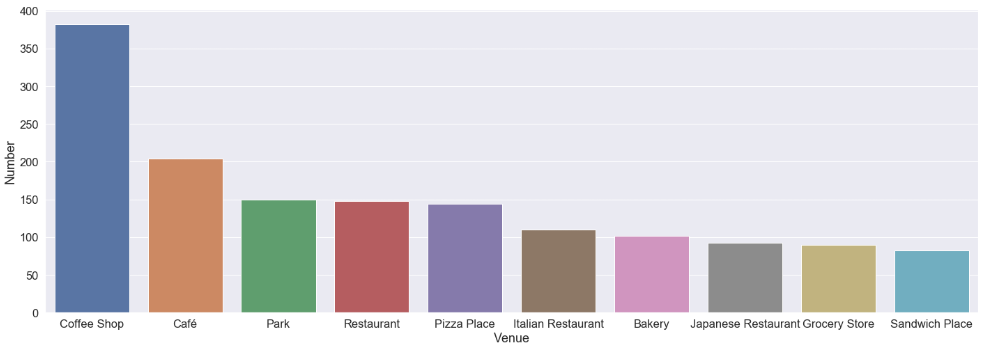

In [128]:
neighborhood_venues

,Neighborhood,Venue,Latitude,Longitude,Category
0,Parkwoods,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,Parkwoods,Brookbanks Park,43.751976,-79.332140,Park
2,Parkwoods,Tim Hortons,43.760668,-79.326368,Café
3,Parkwoods,A&W,43.760643,-79.326865,Fast Food Restaurant
4,Parkwoods,Bruno's valu-mart,43.746143,-79.324630,Grocery Store
5,Parkwoods,High Street Fish & Chips,43.745260,-79.324949,Fish & Chips Shop
6,Parkwoods,Food Basics,43.760549,-79.326045,Supermarket
7,Parkwoods,Shoppers Drug Mart,43.745315,-79.325800,Pharmacy
8,Parkwoods,Shoppers Drug Mart,43.760857,-79.324961,Pharmacy
9,Parkwoods,Variety Store,43.751974,-79.333114,Food & Drink Shop


In [190]:
#creating a dataframe with values of important locations in each neighborhood
locations=pd.DataFrame(columns=['Neighborhood','Restaurant','Park','Bank','Pharmacy',
                                'Coffee','Café','Bar','Pizza','Gym','Grocery Store'])
locations['Neighborhood']=neighborhoods['Neighborhood'].str.strip()

In [192]:
#Populate the number of important locations in each neighborhood
location_names=locations.columns[1:]
for N in locations['Neighborhood']:
    x=neighborhood_venues[neighborhood_venues['Neighborhood'].str.match(N)]
    for name in location_names:
        z=x[x['Category'].str.contains(name)]
        locations[name][locations['Neighborhood'].str.match(N)]=len(z)
locations.head()


,Neighborhood,Restaurant,Park,Bank,Pharmacy,Coffee,Café,Bar,Pizza,Gym,Grocery Store
0,Parkwoods,3,3,0,2,1,1,0,1,0,1
1,Victoria Village,1,1,0,0,2,0,0,0,2,0
2,"Regent Park , Harbourfront",20,4,1,1,15,4,1,1,2,1
3,"Lawrence Manor , Lawrence Heights",13,1,1,0,3,0,0,0,2,1
4,"Queen's Park , Ontario Provincial Government",24,4,0,0,8,2,6,2,1,1


In [146]:
# locations.sum()[1:].to_frame()
locations["Total"]=locations.drop('Neighborhood', axis=1).sum(axis=1).to_frame()
locations.fillna(0,inplace=True)
locations["Total"]=locations["Total"].astype(int)
locations

,Neighborhood,Restaurant,Park,Bank,Pharmacy,Coffee,Café,Bar,Pizza,Gym,Grocery Store,Total
0,Parkwoods,3,3,0,2,1,1,0,1,0,1,12
1,Victoria Village,1,1,0,0,2,0,0,0,2,0,6
2,"Regent Park , Harbourfront",20,4,1,1,15,4,1,1,2,1,50
3,"Lawrence Manor , Lawrence Heights",13,1,1,0,3,0,0,0,2,1,21
4,"Queen's Park , Ontario Provincial Government",24,4,0,0,8,2,6,2,1,1,48
5,Islington Avenue,0,1,1,2,0,1,0,0,0,1,6
6,"Malvern , Rouge",5,0,1,0,2,0,0,0,0,0,8
7,Don Mills,24,1,3,0,7,1,1,2,4,0,43
8,"Parkview Hill , Woodbine Gardens",2,0,1,1,1,0,0,2,1,0,8
9,"Garden District, Ryerson",27,2,0,0,10,2,5,1,2,1,50


## Clustering Neighborhoods
Using *k*-means to cluster the neighborhood into 3 clusters.

In [154]:
# set number of clusters
kclusters = 3
grp_neighborhoods_clustered = locations.drop('Neighborhood', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grp_neighborhoods_clustered)

In [155]:
# add clustering labels
neighborhoods_clustered=pd.DataFrame(columns=["Neighborhood","ClusterLabel","Latitude","Longitude"])
neighborhoods_clustered["Neighborhood"] = locations["Neighborhood"]
neighborhoods_clustered["ClusterLabel"] = kmeans.labels_   
neighborhoods_clustered["Total"] = locations["Total"]
neighborhoods_clustered["Latitude"] = neighborhoods["Latitude"]
neighborhoods_clustered["Longitude"] = neighborhoods["Longitude"]
merged = neighborhoods_clustered
merged = merged.sort_values('Total')
merged

,Neighborhood,ClusterLabel,Latitude,Longitude,Total
95,Upper Rouge,0,43.836125,-79.205636,0
94,Northwest,0,43.706748,-79.594054,1
57,"Humberlea , Emery",0,43.724766,-79.532242,1
12,"Rouge Hill , Port Union , Highland Creek",0,43.784535,-79.160497,2
45,"York Mills , Silver Hills",0,43.757490,-79.374714,3
101,"Old Mill South , King's Mill Park , Sunnylea ,...",0,43.636258,-79.498509,5
87,"CN Tower , King and Spadina , Railway Lands , ...",0,43.628947,-79.394420,5
51,"Cliffside , Cliffcrest , Scarborough Village West",0,43.716316,-79.239476,6
50,Humber Summit,0,43.756303,-79.565963,6
56,"Del Ray , Mount Dennis , Keelsdale and Silvert...",0,43.691116,-79.476013,6


### Obtaining the number of neighborhoods in each Cluster

In [ ]:
clusterCounts=neighborhoods_clustered['ClusterLabel'].value_counts().to_frame().reset_index()
clusterCounts.columns=['ClusterLabel','Count']
clusterCounts['ClusterLabel']=clusterCounts['ClusterLabel'].astype(int)
clusterCounts['ClusterLabel'][0]='Low'
clusterCounts['ClusterLabel'][1]='Medium'
clusterCounts['ClusterLabel'][2]='High'

plt.figure(figsize=(9, 6))
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
ax = sns.barplot(x="ClusterLabel", y="Count", data=clusterCounts)

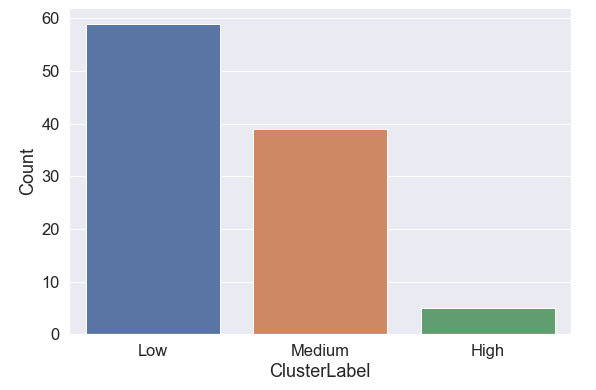

In [187]:
clusterCounts

,ClusterLabel,Count
0,0,59
1,2,39
2,1,5


We obtain the above clusters based on availability of important locations:
<table>
    <tr><th>Cluster</th><th>Label</th><th>Color</th></tr>
    <tr><td>0</td><td>Low Availability</td><td>Blue</td></tr>
    <tr><td>2</td><td>Medium Availability</td><td>Orange</td></tr>
    <tr><td>1</td><td>High Availability</td><td>Green</td></tr>    
</table>


### Visualizing the resulting clusters


In [ ]:
colormap=['deepskyblue','darkorange','forestgreen']
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

markers_colors = []
for lat, lon, poi, cluster in zip(merged['Latitude'], merged['Longitude'], merged['Neighborhood'], merged['ClusterLabel']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon], radius=6, popup=label, color='black',fill=True,
                        fill_color=colormap[int(cluster)],fill_opacity=0.75).add_to(map_clusters)
       
map_clusters

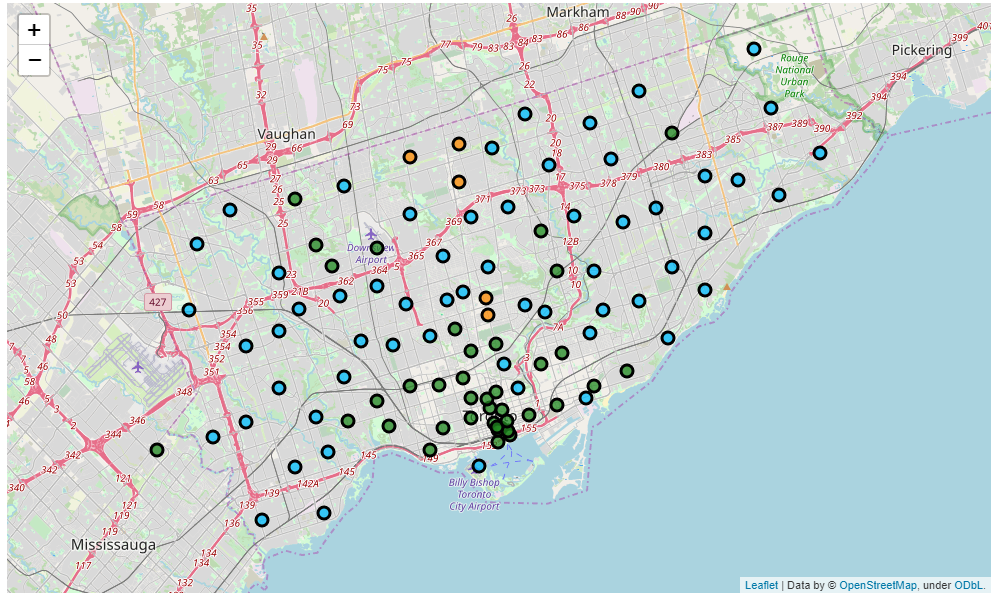